In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify

In [131]:

load_dataset = pd.read_csv('C:\\Users\\Seluk\\crime detection\\train\\police_department_data.csv')

In [132]:
load_dataset.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29-01-2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29-01-2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,25-04-2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,05-01-2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,01-01-2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)"


In [133]:
load_dataset.describe()

,incident_id,department_id
count,1.505000e+05,1.505000e+05
mean,1.616440e+08,1.616440e+13
std,5.535976e+06,5.535976e+11
min,1.135121e+07,1.135120e+12
25%,1.603283e+08,1.603280e+13
50%,1.606541e+08,1.606540e+13
75%,1.609764e+08,1.609760e+13
max,9.910090e+08,9.910090e+13


In [69]:
load_dataset.isnull().sum()

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
address                0
department_id          0
location               0
dtype: int64

In [70]:
# filling the missing value in PdDistrict using the mode values

load_dataset['department_district'].fillna(load_dataset['department_district'].mode()[0], inplace = True)

load_dataset.isnull().any().any()

False

In [71]:
load_dataset = pd.read_csv('C:\\Users\\Seluk\\crime detection\\train\\police_department_data.csv')

In [115]:
load_dataset.shape

(150500, 10)

In [73]:
# visualization


C:\Users\Seluk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


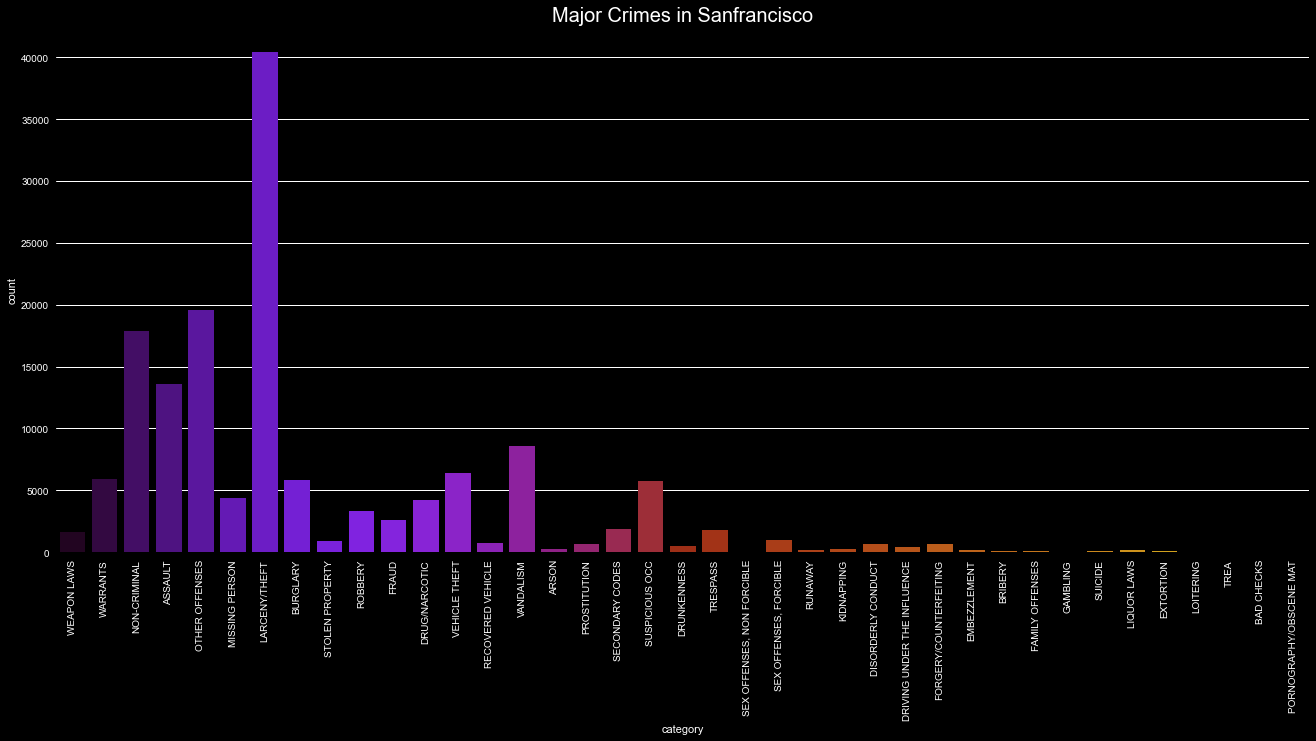

In [119]:
plt.rcParams['figure.figsize'] = (20,9)
plt.style.use('dark_background')

sns.countplot(load_dataset['category'], palette = 'gnuplot')

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize =20)
plt.xticks(rotation = 90)
plt.show()

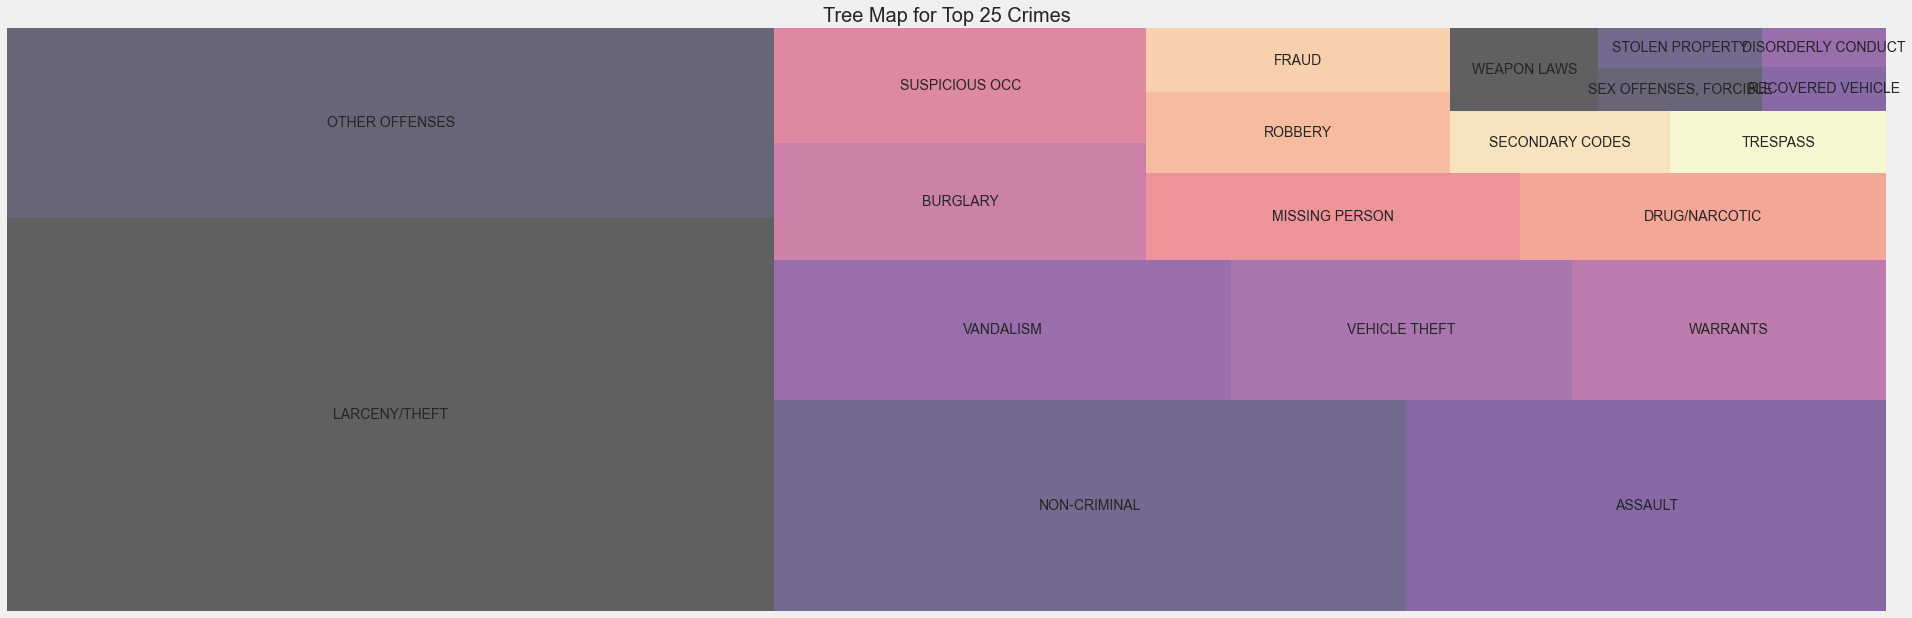

In [146]:
y =load_dataset['category'].value_counts().head(20)
plt.rcParams['figure.figsize']=(30,10)
plt.style.use('fivethirtyeight')

color= plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.6, color=color)
plt.title('Tree Map for Top 25 Crimes',fontsize = 20)

plt.axis('off')
plt.show()

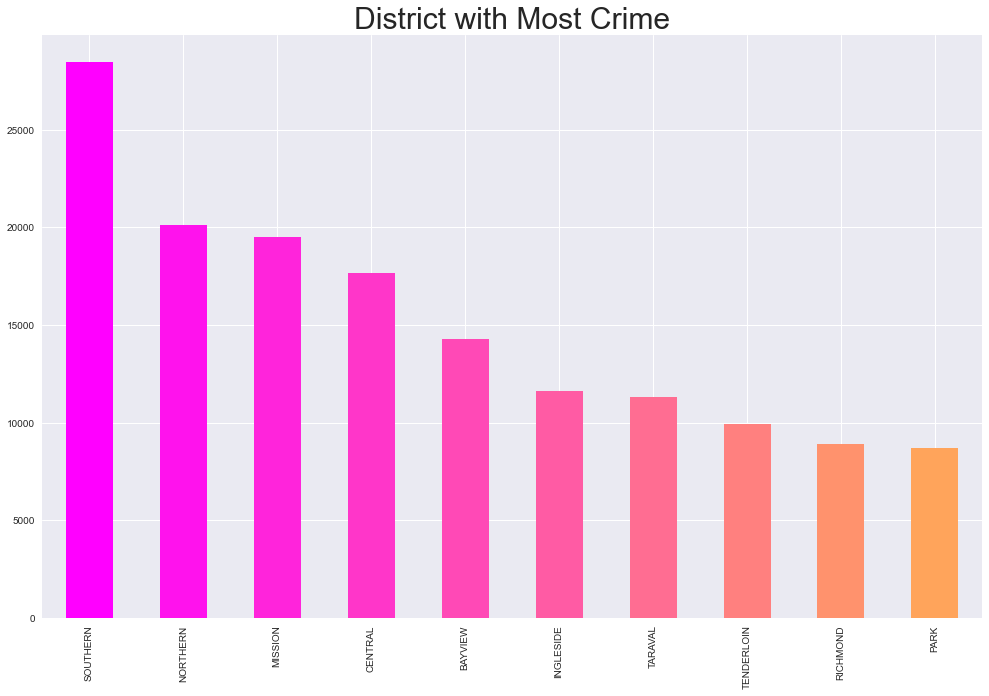

In [147]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20,9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0,1,15))
load_dataset['department_district'].value_counts().plot.bar(color = color, figsize=(15,10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

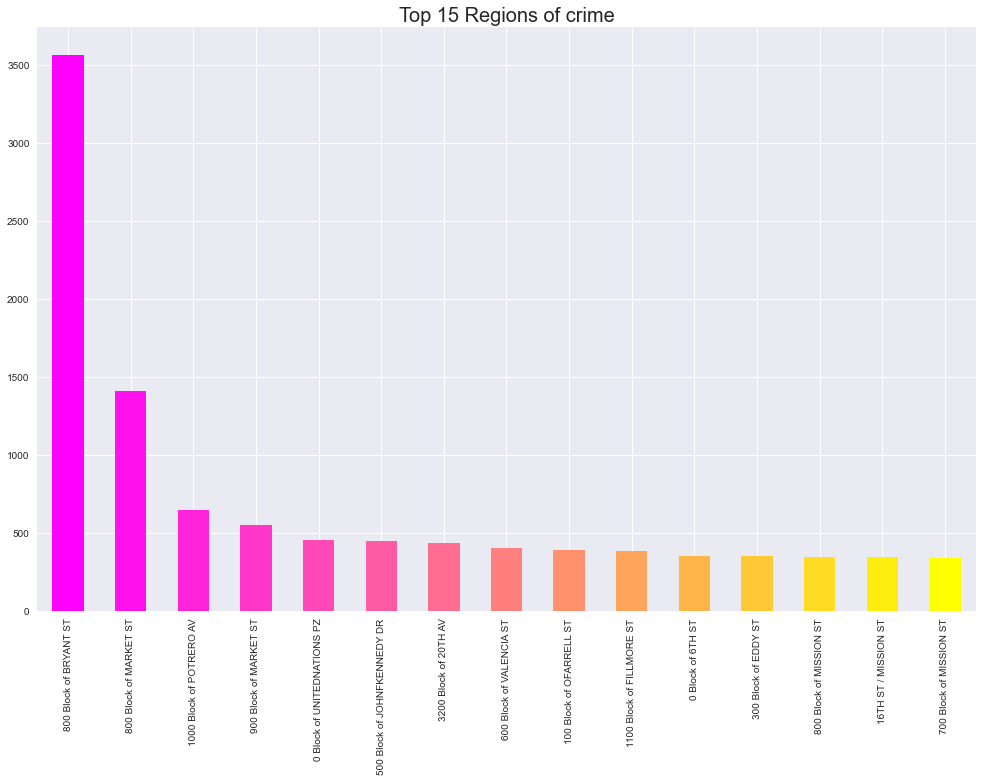

In [129]:
plt.rcParams['figure.figsize'] = (20,9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0,1,15))
load_dataset['address'].value_counts().head(15).plot.bar(color = color, figsize=(15,10))

plt.title('Top 15 Regions of crime', fontsize =20)

plt.xticks(rotation = 90)
plt.show()

ValueError: 'explode' must be of length 'x'

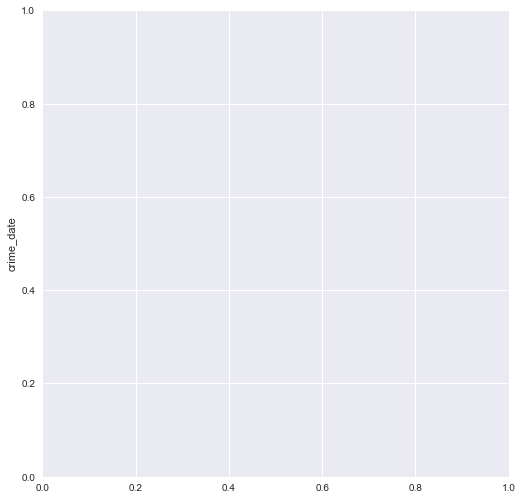

In [149]:
plt.style.use('seaborn')



load_dataset['crime_date'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

ValueError: 'explode' must be of length 'x'

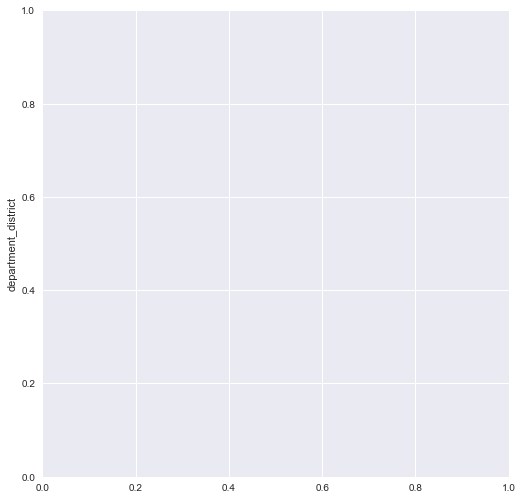

In [151]:
plt.style.use('seaborn')


load_dataset['department_district'].value_counts().head().plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

ValueError: 'explode' must be of length 'x'

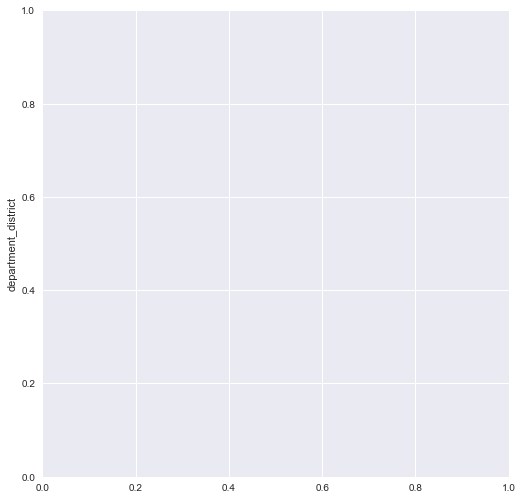

In [153]:

ax=plt.subplots(1,1,figsize=(10,8))
load_dataset['department_district'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title(" jbgchjb%")
plt.show()

C:\Users\Seluk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


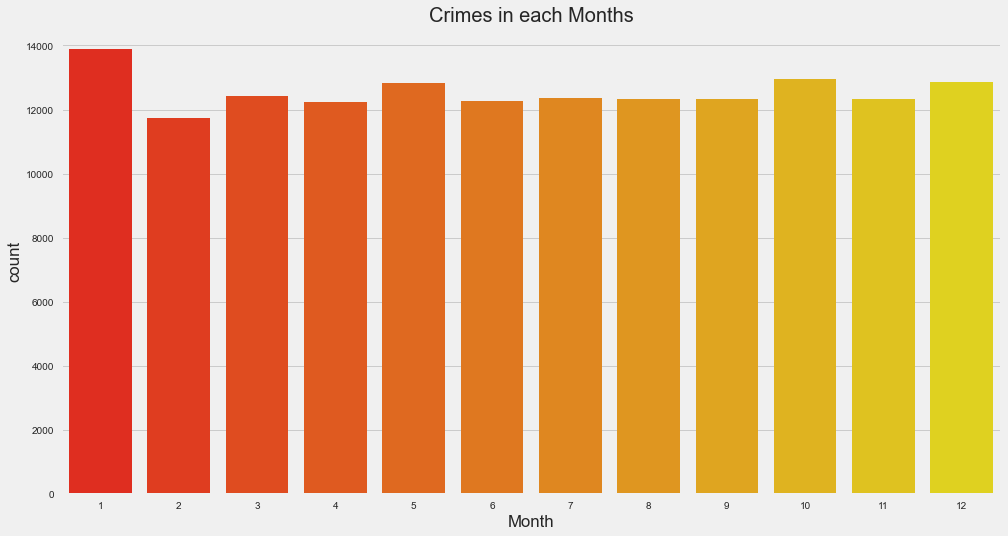

In [92]:
load_dataset['crime_date'] = pd.to_datetime(load_dataset['crime_date'])

load_dataset['Month'] =load_dataset['crime_date'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(load_dataset['Month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

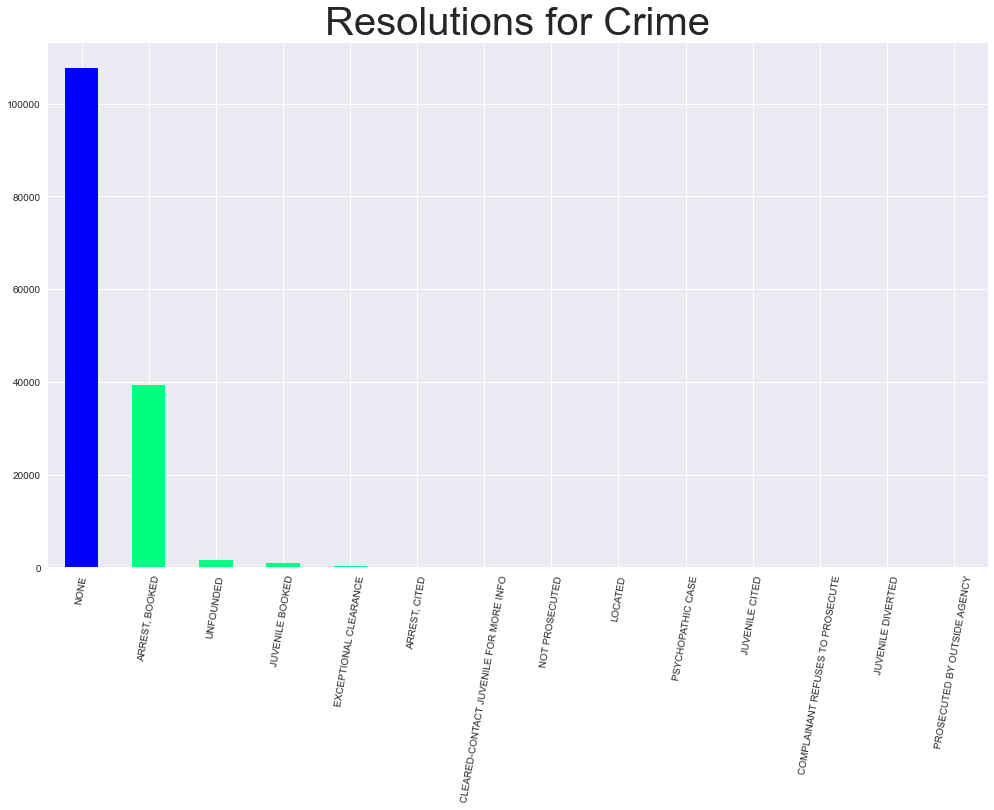

In [110]:
plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 100, 20))
load_dataset['resolution'].value_counts().plot.bar(color = color, figsize = (15, 9))

plt.title('Resolutions for Crime',fontsize = 40)
plt.xticks(rotation = 80)
plt.show()

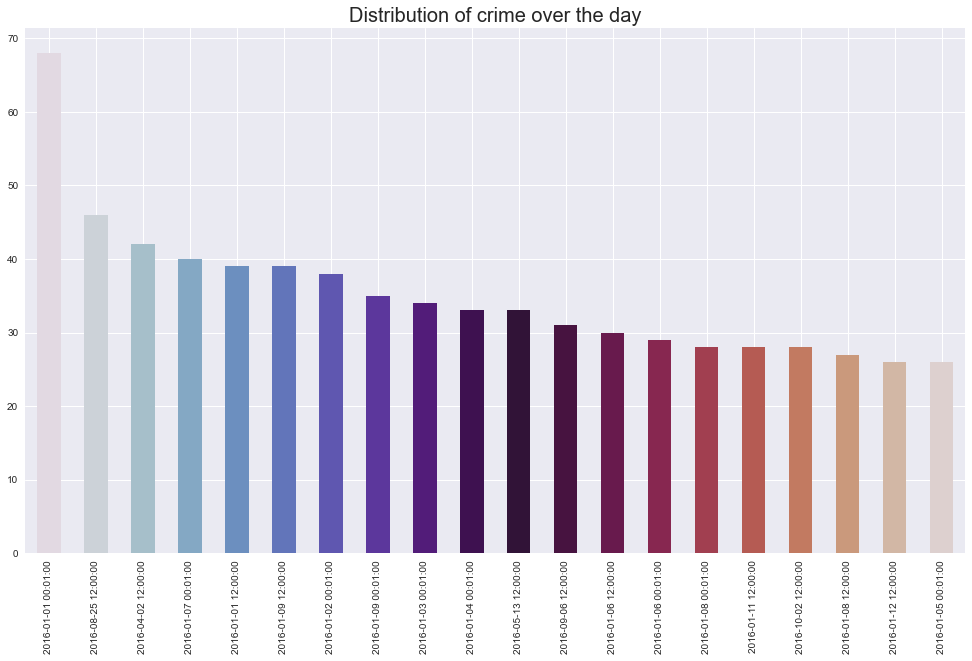

In [112]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
load_dataset['crime_date'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [85]:
t = load_dataset.department_district.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [93]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [94]:
sf_map.choropleth(
    geo_data=gjson,
   load_dataset=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

C:\Users\Seluk\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
